<a href="https://colab.research.google.com/github/wlachape/MAT-421/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 6

Jacobian Matrix

In [9]:
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi

X = Matrix([phi*cos(rho), phi*sin(rho), phi**2])
Y = Matrix([rho, phi])

X.jacobian(Y)

Matrix([
[-phi*sin(rho), cos(rho)],
[ phi*cos(rho), sin(rho)],
[            0,    2*phi]])

Differentiate 17x^6 - 2x^3 + 5

In [11]:
from sympy import *
import numpy as np
## Doing derivatives in python using diff
x = Symbol('x')
y = 17*x**6 - 2*x**3 + 5
yprime = y.diff(x)
yprime

102*x**5 - 6*x**2

Taylor Series Using Loops

In [20]:
import math

x = 6
e_to_6 = 0
for i in range(17):
    e_to_6 += x**i/math.factorial(i)
    
print(e_to_6) ## print the result of our taylor series matrix
print(math.exp(6)) ## Print the python function for e^6

403.35824289995713
403.4287934927351


Support Vector Machines

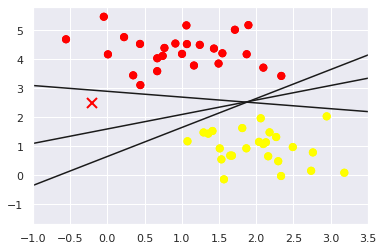

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

xfit = np.linspace(-2, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([-.2], [2.5], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Artificial Neural Networks

[[0.22312305]]  - Correct:  3
[[0.04763575]]  - Correct:  0


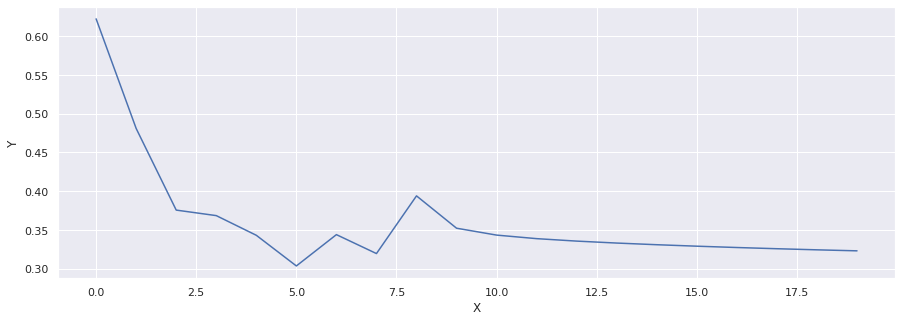

In [47]:
import numpy as np
import matplotlib.pyplot as plt 

# create an array we can use for our Neural Networks
inputs = np.array([[0, 2, 0],
                   [3, 1, 1],
                   [2, 0, 5],
                   [1, 0, 0],
                   [1, 1, 17],
                   [-3, 0, 1]])

outputs = np.array([[0], [0], [0], [1], [1], [1]])

# we create a class for the Neural Network with initialized variables that will allow us to show it on a graph
class NeuralNetwork:

    def __init__(mat, inputs, outputs):
        mat.inputs  = inputs
        mat.outputs = outputs
        mat.weights = np.array([[.50], [.50], [.50]])
        mat.error_history = []
        mat.epoch_list = []

    def sigmoid(mat, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(mat):
        mat.hidden = mat.sigmoid(np.dot(mat.inputs, mat.weights))


    def backpropagation(mat):
        mat.error  = mat.outputs - mat.hidden
        delta = mat.error * mat.sigmoid(mat.hidden, deriv=True)
        mat.weights += np.dot(mat.inputs.T, delta)


    def train(mat, epoch=20):
        for epoch in range(epoch):

            mat.feed_forward()

            mat.backpropagation()    

            mat.error_history.append(np.average(np.abs(mat.error)))
            mat.epoch_list.append(epoch)

                             
    def predict(mat, new_input):
        prediction = mat.sigmoid(np.dot(new_input, mat.weights))
        return prediction

# create and train the Neural Network
NN = NeuralNetwork(inputs, outputs)
NN.train()

# test two examples                                  
example = np.array([[3, 1, 1]])
example_2 = np.array([[0, 2, 0]])

# print to two predictions for the examples                
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the graph
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()